In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

from nltk.corpus import stopwords
from nltk import word_tokenize

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("movies review.xlsx")

In [3]:
df.head()

,Sr. No.,Review,Sentiment
0,1,The movie was a heartwarming tale of friendshi...,Positive
1,2,"The plot was predictable and boring, with no r...",Negative
2,3,I loved every minute of it! The visuals were s...,Positive
3,4,"An absolute disaster. The script was weak, and...",Negative
4,5,"The action sequences were mind-blowing, and th...",Positive


In [4]:
df.columns = ["Sr. No.", "Review", "Sentiment"]

In [5]:
reviews = df["Review"]

In [6]:
stop_words = set(stopwords.words("english"))

In [7]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [8]:
cleaned_reviews = []
for i in reviews.tolist():
    review_tokens = word_tokenize(i.lower())
    ls = []
    for words in review_tokens:
        if words.isalpha():
            if words not in stop_words:
                ls.append(words)
    cleaned_reviews.append(" ".join(ls))

In [9]:
sentiment = df["Sentiment"]

In [10]:
tokenize = Tokenizer()

In [11]:
tokenize.fit_on_texts(cleaned_reviews)

In [12]:
seq = tokenize.texts_to_sequences(reviews)

In [13]:
seq

[[1, 21, 51, 52, 53, 7, 54, 5, 55, 12, 22, 56],
 [4, 57, 58, 23, 59, 8, 60, 9, 2, 24, 61, 25],
 [62, 63, 64, 26, 27, 10, 28, 65, 66, 67, 29, 68],
 [69, 70, 30, 31, 3, 32, 71, 72],
 [73, 74, 75, 76, 77, 11, 9, 33, 6, 78],
 [2, 79, 80, 81, 82, 83, 84, 14, 85, 34, 86, 15],
 [35, 36, 87, 88, 7, 89, 10, 90, 16, 91, 9, 37, 92],
 [93, 4, 94, 3, 2, 38, 95, 5, 17, 96, 97],
 [98, 2, 99, 100, 101, 18, 39, 102, 103],
 [40, 104, 105, 106, 1, 107, 108, 109, 110],
 [41, 1, 111, 112, 113, 114, 42, 7, 115, 15],
 [43, 116, 4, 44, 117, 6, 118, 1, 119, 120],
 [121, 122, 5, 8, 45, 46, 1, 123],
 [124, 125, 126, 4, 127, 3, 128, 23, 129],
 [21, 10, 130, 131, 16, 132, 133, 18, 134, 12, 135],
 [45, 46, 136, 1, 4, 137, 8, 17, 138, 139, 47],
 [11, 9, 19, 6, 140, 20, 141, 3, 142, 143],
 [17, 144, 145, 146, 147, 148, 149, 1, 48, 150, 16, 32],
 [151, 152, 153, 154, 41, 39, 155, 156, 15],
 [34, 1, 38, 157, 14, 158, 43, 159, 160],
 [2, 161, 27, 42, 20, 3, 162, 49, 18],
 [163, 164, 35, 2, 165, 30, 166, 5, 31],
 [29, 16

In [14]:
vocab_size = len(tokenize.word_index)+1
vocab_size

211

In [15]:
tokenize.word_index

{'movie': 1,
 'film': 2,
 'characters': 3,
 'plot': 4,
 'direction': 5,
 'seen': 6,
 'performances': 7,
 'acting': 8,
 'best': 9,
 'story': 10,
 'one': 11,
 'left': 12,
 'could': 13,
 'pacing': 14,
 'watch': 15,
 'emotional': 16,
 'felt': 17,
 'perfect': 18,
 'movies': 19,
 'storyline': 20,
 'heartwarming': 21,
 'feeling': 22,
 'real': 23,
 'dragged': 24,
 'long': 25,
 'visuals': 26,
 'stunning': 27,
 'kept': 28,
 'truly': 29,
 'script': 30,
 'weak': 31,
 'depth': 32,
 'films': 33,
 'found': 34,
 'cast': 35,
 'incredible': 36,
 'way': 37,
 'total': 38,
 'chemistry': 39,
 'completely': 40,
 'fantastic': 41,
 'captivating': 42,
 'dialogue': 43,
 'full': 44,
 'special': 45,
 'effects': 46,
 'time': 47,
 'lacked': 48,
 'ending': 49,
 'nothing': 50,
 'tale': 51,
 'friendship': 52,
 'perseverance': 53,
 'stellar': 54,
 'spot': 55,
 'inspired': 56,
 'predictable': 57,
 'boring': 58,
 'twists': 59,
 'mediocre': 60,
 'far': 61,
 'loved': 62,
 'every': 63,
 'minute': 64,
 'engaged': 65,
 'start'

In [16]:
max_length = max([len(s) for s in seq])
max_length

14

In [17]:
padded_seq = sequence.pad_sequences(seq, maxlen=max_length, padding="post")

In [18]:
padded_seq

array([[  1,  21,  51,  52,  53,   7,  54,   5,  55,  12,  22,  56,   0,
          0],
       [  4,  57,  58,  23,  59,   8,  60,   9,   2,  24,  61,  25,   0,
          0],
       [ 62,  63,  64,  26,  27,  10,  28,  65,  66,  67,  29,  68,   0,
          0],
       [ 69,  70,  30,  31,   3,  32,  71,  72,   0,   0,   0,   0,   0,
          0],
       [ 73,  74,  75,  76,  77,  11,   9,  33,   6,  78,   0,   0,   0,
          0],
       [  2,  79,  80,  81,  82,  83,  84,  14,  85,  34,  86,  15,   0,
          0],
       [ 35,  36,  87,  88,   7,  89,  10,  90,  16,  91,   9,  37,  92,
          0],
       [ 93,   4,  94,   3,   2,  38,  95,   5,  17,  96,  97,   0,   0,
          0],
       [ 98,   2,  99, 100, 101,  18,  39, 102, 103,   0,   0,   0,   0,
          0],
       [ 40, 104, 105, 106,   1, 107, 108, 109, 110,   0,   0,   0,   0,
          0],
       [ 41,   1, 111, 112, 113, 114,  42,   7, 115,  15,   0,   0,   0,
          0],
       [ 43, 116,   4,  44, 117,   6, 118, 

In [19]:
labels = np.array([1 if i == "Positive" else 0 for i in sentiment])
labels

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0])

In [31]:
model = Sequential([
    Embedding(vocab_size, 32, input_length=max_length),
    SimpleRNN(32),
    Dense(1, activation="sigmoid")
])

In [32]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [33]:
model.fit(padded_seq, labels, epochs=40)

Epoch 1/40
1/1 [==============================] - 1s 1s/step - loss: 0.6924 - accuracy: 0.4667
Epoch 2/40
1/1 [==============================] - 0s 10ms/step - loss: 0.6587 - accuracy: 0.6333
Epoch 3/40
1/1 [==============================] - 0s 10ms/step - loss: 0.6274 - accuracy: 0.9000
Epoch 4/40
1/1 [==============================] - 0s 10ms/step - loss: 0.5967 - accuracy: 0.9333
Epoch 5/40
1/1 [==============================] - 0s 10ms/step - loss: 0.5654 - accuracy: 0.9667
Epoch 6/40
1/1 [==============================] - 0s 10ms/step - loss: 0.5330 - accuracy: 1.0000
Epoch 7/40
1/1 [==============================] - 0s 9ms/step - loss: 0.4988 - accuracy: 1.0000
Epoch 8/40
1/1 [==============================] - 0s 11ms/step - loss: 0.4629 - accuracy: 1.0000
Epoch 9/40
1/1 [==============================] - 0s 12ms/step - loss: 0.4252 - accuracy: 1.0000
Epoch 10/40
1/1 [==============================] - 0s 10ms/step - loss: 0.3863 - accuracy: 1.0000
Epoch 11/40
1/1 [===============

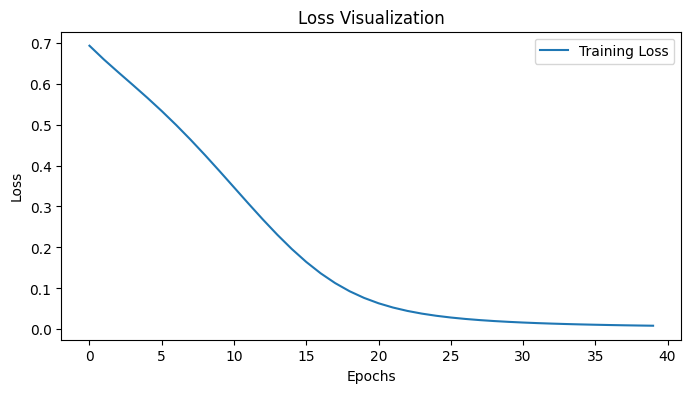

In [34]:
plt.figure(figsize=(8, 4))
plt.plot(model.history.history["loss"], label="Training Loss")
plt.legend()
plt.title("Loss Visualization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

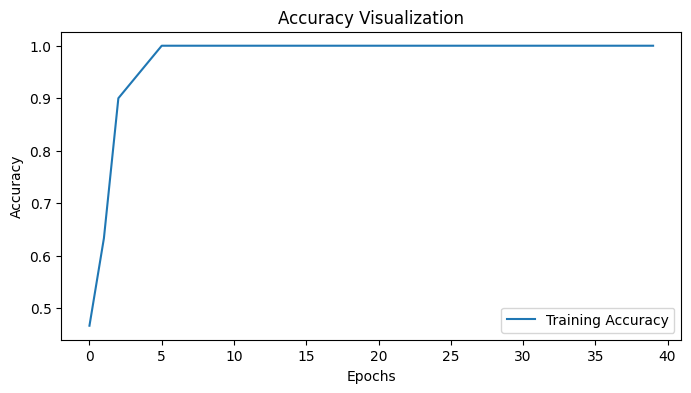

In [35]:
plt.figure(figsize=(8, 4))
plt.plot(model.history.history["accuracy"], label="Training Accuracy")
plt.legend()
plt.title("Accuracy Visualization")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [36]:
def sentiment_prediction(sent):
    cleaned = " ".join([i for i in word_tokenize(sent.lower()) if i not in stop_words and i.isalpha()])
    new_seq = tokenize.texts_to_sequences([cleaned])
    new_padded_seq = sequence.pad_sequences(new_seq, maxlen=max_length, padding="post")
    pred = model.predict(new_padded_seq)
    pred_sentiment = "Positive" if pred >= 0.5 else "Negative"
    return f"The predicted sentiment is {pred_sentiment}, {pred}"

In [37]:
sentiment_prediction("I couldn't stand watching it, a complete waste of time.")

1/1 [==============================] - 0s 175ms/step


'The predicted sentiment is Negative, [[0.03590907]]'

In [38]:
sentiment_prediction("A beautifully crafted story that tugs at the heartstrings")

1/1 [==============================] - 0s 30ms/step


'The predicted sentiment is Positive, [[0.9771833]]'